# LAB 1: Dataset Selection 


As a group, we discussed three datasets that we found interesting. Given below are the datasets:
1.	Star Classification: This dataset classifies stars into six class types
2.	Mobile Price Prediction: This dataset classifies the mobile prices into 3 ranges(low, high, very high).
3.	Car Price Prediction: This dataset predicts the price of cars

We discussed the pros and cons for each dataset, and also checked with our Lab Tutor Professor Ali. Some notes from our discussion:

	Star Classification was an interesting and unique dataset, but only had 6 attributes. This was not enough to perform feature selection with and derive new conclusions. We rejected this dataset for this reason.

	Car Price prediction had a good number of attributes (26 columns), however most of these columns were information that we could not use or was not clearly described. We realized that there was a lack of quality in the data. There was also the issue of the prices being continuous variables, and not a classification, this would require us to clean and transform the data. Transforming the data to price ranges for the purpose of classification would result in the data being biased to the range we have chosen. Therefore, this dataset was rejected.

	In the end, mobile price prediction was the chosen dataset for our coursework. It had a good amount of attributes (22 Columns), clear attribute descriptions, a price range for low, high and very high costs. The number of columns was a good quantity to perform feature selection and derive new conclusions. Mobiles are also a technological device that we are well versed in, and therefore it was an interesting topic for us. Thus, this was the final dataset chosen.

We decided to choose two datasets, one which was image based and one numerical and data focused. For the image dataset, we chose face mask detection. This dataset classifies whether a person is wearing a mask, not wearing a mask, or wearing it incorrectly

The links to the two final chosen datasets:
1.	Mobile price prediction: https://www.kaggle.com/code/vikramb/mobile-price-prediction
2.	Face-mask detection: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection


# General Setup 

In [115]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [116]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [117]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
np.random.seed(42)
import csv


In [118]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# LAB 2 : Visualization and Initial Data Exploration

Tasks Done: Dataset was loaded onto the jupyter notebook, and code from tutorial 1 was 
run. We created visualizations for our data and analyzed the correlations. 

Data preprocessing and normalization:

- No anomalies were detected in dataset
- No missing data/null values found

Therefore, no normalization of data was required.  

Experiments were done with combining features (We created a new feature Screen Size by combining the screen wifth and height features)

Histograms and Scatterplots were created for the different features.

Correlation was checked for the different features.

In [119]:
#loading the dataset
dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

In [120]:
#print the header rows (first 5 rows)
dataset.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [121]:
#the shape of the dataset the number of rows and columns
dataset.shape 

(2000, 21)

In [122]:
#intialise variable mobile to store the dataset
mobile=dataset 

In [123]:
#basic info abt the dataset to check if there are any null values
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [124]:
#This method shows a statistical summary of the numerical attributes 
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


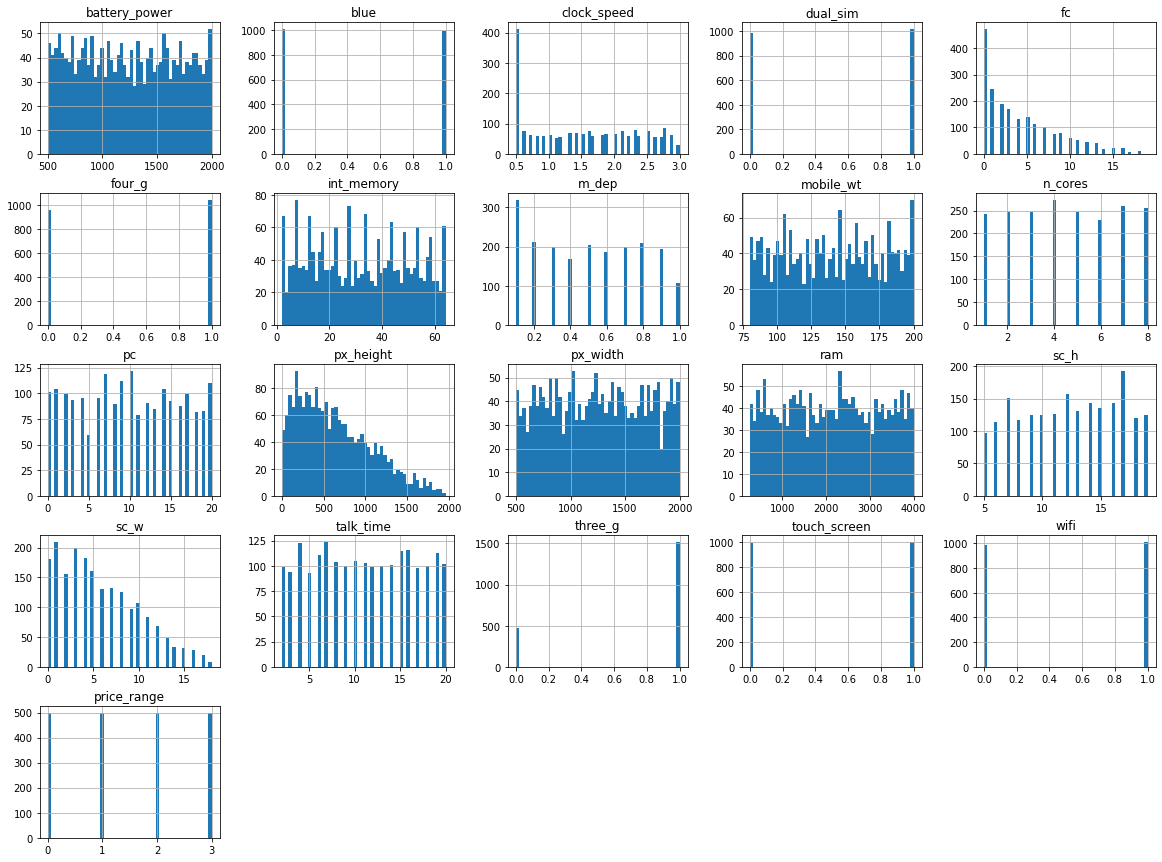

In [125]:
#To plot a histogram for each numerical attribute
mobile.hist(bins=50, figsize=(20,15)) 
plt.show()

In [126]:
# Correlation of all the attributes with the expected class attribute 
corr_matrix = mobile.corr() 

In [127]:
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [128]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='battery_power', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_width'>,
        <AxesSubplot:xlabel='ram', ylabel='px_width'>,
        <AxesSubplot:xlabel='battery_power', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_width'>]], dtype=objec

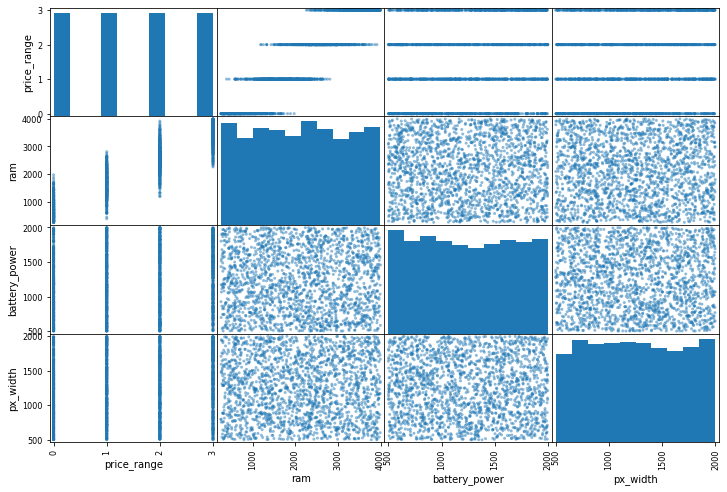

In [129]:
attributes = ["price_range", "ram", "battery_power",
              "px_width"]
scatter_matrix(mobile[attributes], figsize=(12, 8))

(0.0, 3998.0, 0.0, 4.0)

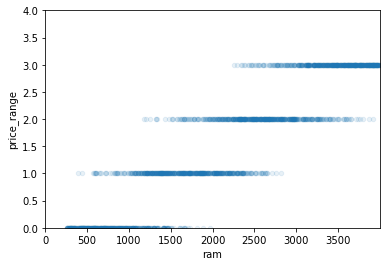

In [130]:
mobile.plot(kind="scatter", x="ram", y="price_range",
             alpha=0.1)
plt.axis([0, 3998, 0, 4])


In [131]:
# experimenting by combining features
mobile["screensize"]=mobile["px_height"]*mobile["px_width"]

<AxesSubplot:xlabel='screensize', ylabel='price_range'>

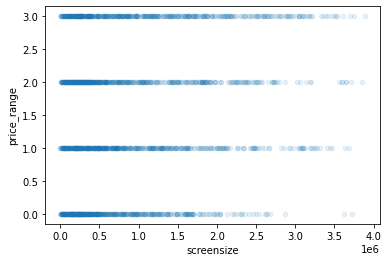

In [132]:
mobile.plot(kind="scatter", x="screensize", y="price_range",
             alpha=0.1)

# Lab 3: Feature Selection

We decided to convert the dataset to suit a binary classifier. The original dataset had 4 classes - 0,1,2,3 for the different mobile price ranges. We have grouped together 0,1 and 2,3 to have two final classes 0 and 1 (0-low price, 1-high price).

We created three different datasets (DF3, DF5, DF7) to test out the different feature selection combinations. 

DF3 - The 3 most correlating features (Ram, Battery Power and Px Width)

DF5 - The 5 most correlating features (Ram, Battery Power, Px width, Px Height, Touchscreen)

DF7 - The 7 most correlating features (Ram, Battery Power, Px width, Px Height, Touchscreen, Screen width, N cores)

We ran the Decision Tree classifier on the original dataset as well as DF3, DF5 and DF7.


In [133]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#checking for most correlating features to class 1

corr_matrix = df.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097951
sc_w             0.035359
n_cores          0.031260
pc               0.027628
three_g          0.024638
fc               0.022464
int_memory       0.022132
wifi             0.014001
blue             0.014001
sc_h             0.009140
dual_sim         0.009002
talk_time        0.004394
clock_speed      0.003494
four_g           0.001001
mobile_wt       -0.007968
m_dep           -0.018554
touch_screen    -0.040001
Name: price_range, dtype: float64

In [134]:
#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [135]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#creating DF3 with three most correlating features

df3 = pd.DataFrame(
    {
        'ram' : df.ram,
        'battery_power' : df.battery_power,
        'px_width' : df.px_width,
        'price_range' : df.price_range
        
    })

#Running a logistic regression classifier on DF3
X=df3.drop(['price_range'],axis=1)
Y=df3['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [136]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#creating DF5 with five most correlating features

df5 = pd.DataFrame(
    {
        'ram' : df.ram,
        'battery_power' : df.battery_power,
        'px_width' : df.px_width,
        'touch_screen' : df.touch_screen,
        'px_height' : df.px_height,
        'price_range' : df.price_range
        
    })

#Running a Descision Tree classifier on DF5
X=df5.drop(['price_range'],axis=1)
Y=df5['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [137]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#creating DF7 with seven most correlating features

df7 = pd.DataFrame(
    {
        'ram' : df.ram,
        'battery_power' : df.battery_power,
        'px_width' : df.px_width,
        'touch_screen' : df.touch_screen,
        'px_height' : df.px_height,
        'sc_w' : df.sc_w,
        'n_cores' : df.n_cores,
        'price_range' : df.price_range
        
    })

#Running a logistic regression classifier on DF3
X=df7.drop(['price_range'],axis=1)
Y=df7['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
classifier = RandomForestClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97


# Lab 4: Classifier Testing and Evaluation

We are running the decision tree classifier on the original dataset. Evaluation and testing is done on this classifier by calculating:

- cross-validation score
- plotting a confusion matrix
- checking the accuracy on training and test data
- checking the precision on training and test data
- recall on training and test data
- f1 score on training and test data

DECISION TREE CLASSIFIER EVALUATION

In [138]:
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = DecisionTreeClassifier()
clf =classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9318181818181818


In [139]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94630872, 0.93288591, 0.93946188])

In [140]:
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[636,  41],
       [ 37, 626]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


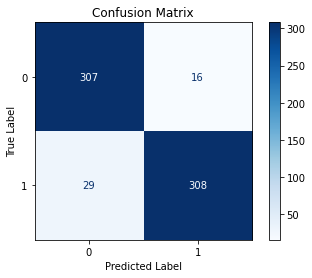

In [141]:
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()



In [142]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.9318181818181818


In [143]:
#accuracy on train data 
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print(training_data_accuracy)

1.0


In [144]:
# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.9506172839506173


In [145]:
# recall for training data predictions
recall_train = recall_score(y_train, X_train_prediction)
print('Training data Recall =', recall_train)

Training data Recall = 1.0


In [146]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.913946587537092


In [147]:
# F1 score for training data predictions
from sklearn.metrics import f1_score
f1_score_train = f1_score(y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 1.0


In [148]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.913946587537092


In [149]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)

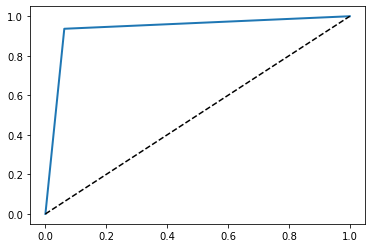

In [150]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [151]:
from sklearn.naive_bayes import MultinomialNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = MultinomialNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.793939393939394


In [152]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.81879195, 0.80536913, 0.82511211])

In [153]:
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


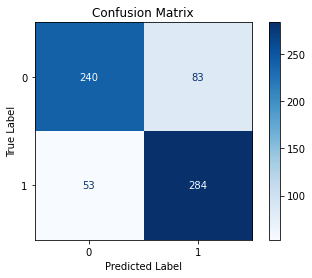

In [154]:
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [155]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.793939393939394


In [156]:
# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.773841961852861


In [157]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.8427299703264095


In [158]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.8427299703264095


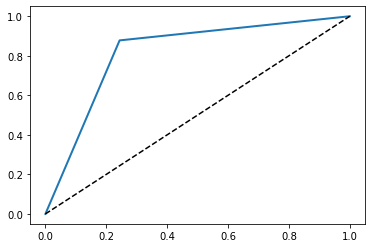

In [159]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [160]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8170528750075192

In [161]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print(sensitivity1)

0.7562776957163959


In [162]:
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Specificity :  0.8778280542986425


In [163]:
from sklearn.naive_bayes import GaussianNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = GaussianNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9257575757575758


In [164]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94407159, 0.93288591, 0.94394619])

In [165]:
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


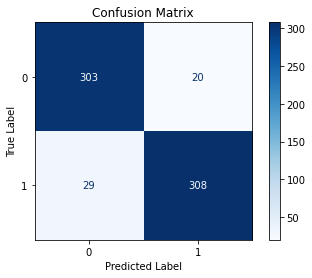

In [166]:
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [167]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.9257575757575758


In [168]:
# precision for test data predictions
from sklearn.metrics import precision_score
precision_test = precision_score(y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.9390243902439024


In [169]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.913946587537092


In [170]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.913946587537092


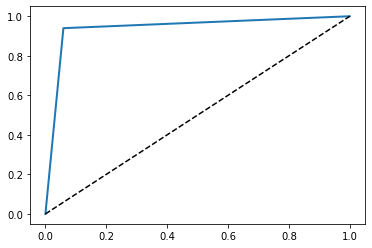

In [171]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [172]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9402919899922245

In [173]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print(sensitivity1)

0.9409158050221565


In [174]:
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Specificity :  0.9396681749622926


In [175]:
from sklearn.naive_bayes import ComplementNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = ComplementNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.793939393939394


In [176]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.81879195, 0.80536913, 0.82511211])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


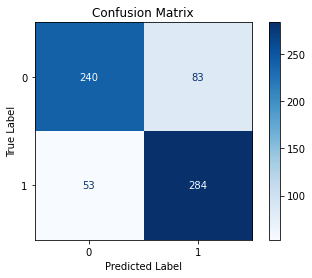

In [177]:
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [178]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.793939393939394


In [179]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.8427299703264095


In [180]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.8427299703264095


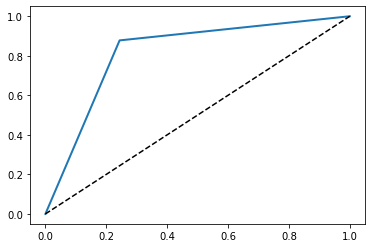

In [181]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [182]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8170528750075192

In [183]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print(sensitivity1)

0.7562776957163959


In [184]:
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Specificity :  0.8778280542986425


In [185]:
from sklearn.naive_bayes import BernoulliNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = BernoulliNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [187]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.4966443 , 0.51230425, 0.49103139])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


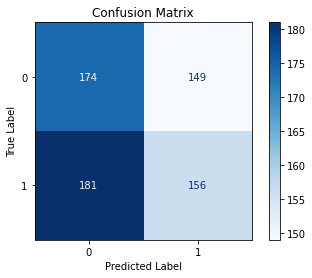

In [189]:
#confusion matrix
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
cm=confusion_matrix(y_train, y_train_pred)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [190]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.5


In [191]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.4629080118694362


In [192]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.4629080118694362


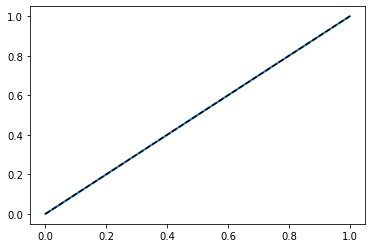

In [193]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [194]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.500210537572602

In [195]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print(sensitivity1)

0.48005908419497784


In [196]:
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Specificity :  0.5203619909502263


In [197]:
from sklearn.naive_bayes import CategoricalNB
#loading the original dataset
original_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') 

#making the dataset suitable for a binary classifier
original_dataset.loc[(original_dataset.price_range == 1), ('price_range') ] = 0
original_dataset.loc[(original_dataset.price_range != 0), ('price_range') ] = 1
df=original_dataset

#Running a decision tree classifier on original dataset
X=df.drop(['price_range'],axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=10)
classifier = CategoricalNB()
clf =classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5575757575757576


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


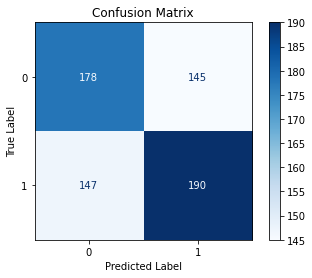

In [199]:
#confusion matrix

cm=confusion_matrix(y_train, y_train_pred)
#plotting the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [200]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

0.5575757575757576


In [201]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.5637982195845698


In [202]:
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.5637982195845698


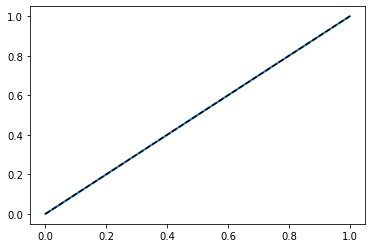

In [205]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [206]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.500210537572602

In [207]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print(sensitivity1)

0.48005908419497784


In [208]:
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Specificity :  0.5203619909502263
